In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV1/'
TrainModelName = 'S54bin2V1.npz'
ValidationModelName = 'S54bin2V1Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'OSnetbin2d38V1f48.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 38
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = False
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='OSnetbin2d38V1f48.h5', batch_size=100, box_vector=5, categories=4, depth=38, epochs=250, gridX=1, gridY=1, learning_rate=1e-06, mid_kernel=3, multievent=False, nboxes=5, residual=False, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
(36076, 1, 1, 9)
loading weights
(36076, 1, 1, 29) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 27s 737us/step - loss: 0.5902 - acc: 0.7870 - val_loss: 0.6400 - val_acc: 0.7699

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6399764757271877, 'val_acc': 0.7698788865733737, 'loss': 0.5901897187302496, 'acc': 0.7870329272153571, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

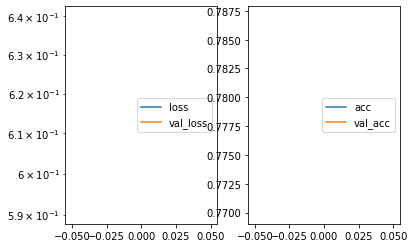

Predicted cell: MatureP1 Probability: [[0.9639358]]
True Cell type: MatureP1
X [[0.46907905]]
True positional value X 0.5
Y [[0.48528776]]
True positional value Y 0.3148148148148148
H [[0.41109562]]
True positional value H 0.2777777777777778
W [[0.4787527]]
True positional value W 0.2222222222222222
C [[0.59296924]]
True positional value C 1.0


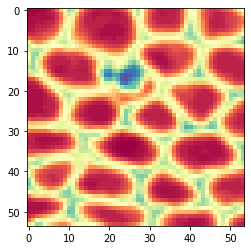

Epoch 2/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.5872 - acc: 0.7804 - val_loss: 0.6369 - val_acc: 0.7630

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6368642672857151, 'val_acc': 0.763033175418225, 'loss': 0.5872058907234824, 'acc': 0.7804357434458447, 'lr': 1e-06}


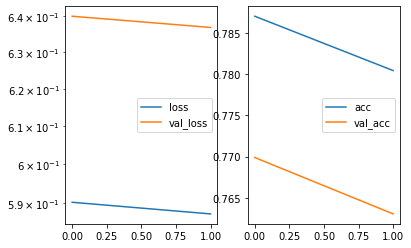

Predicted cell: MacroCheate Probability: [[0.90773296]]
True Cell type: MacroCheate
X [[0.4922691]]
True positional value X 0.3148148148148148
Y [[0.4226992]]
True positional value Y 0.3148148148148148
H [[0.43613344]]
True positional value H 0.5555555555555556
W [[0.35534737]]
True positional value W 0.5
C [[0.53456783]]
True positional value C 1.0


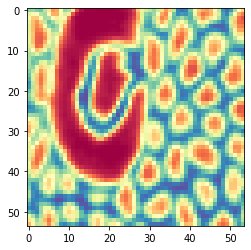

Epoch 3/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.5824 - acc: 0.7777 - val_loss: 0.6335 - val_acc: 0.7551

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6335176172665761, 'val_acc': 0.7551342752056414, 'loss': 0.582412235348779, 'acc': 0.7776915375112311, 'lr': 1e-06}


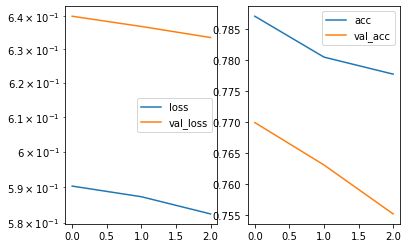

Predicted cell: Normal Probability: [[0.99084306]]
True Cell type: Normal
X [[0.43697077]]
True positional value X 0.5
Y [[0.5234319]]
True positional value Y 0.5
H [[0.48176923]]
True positional value H 0.5185185185185185
W [[0.51060706]]
True positional value W 0.4074074074074074
C [[0.35490075]]
True positional value C 0.0


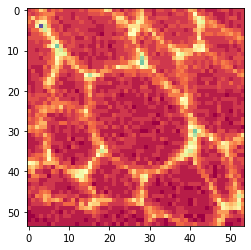

Epoch 4/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.5788 - acc: 0.7684 - val_loss: 0.6294 - val_acc: 0.7593

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6293932856729999, 'val_acc': 0.7593470283280302, 'loss': 0.5787902777251019, 'acc': 0.7684055866297921, 'lr': 1e-06}


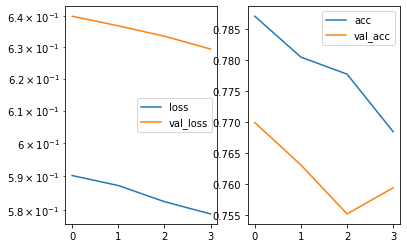

Predicted cell: MatureP1 Probability: [[0.99921906]]
True Cell type: MatureP1
X [[0.6901102]]
True positional value X 0.6851851851851852
Y [[0.38352436]]
True positional value Y 0.3148148148148148
H [[0.42391193]]
True positional value H 0.37037037037037035
W [[0.5202861]]
True positional value W 0.4074074074074074
C [[0.6459311]]
True positional value C 1.0


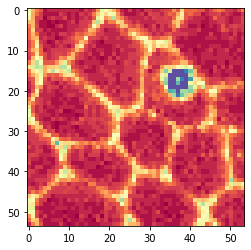

Epoch 5/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.5756 - acc: 0.7675 - val_loss: 0.6269 - val_acc: 0.7457

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6269100348908001, 'val_acc': 0.7456556029103818, 'loss': 0.5755801091689547, 'acc': 0.7675462906343972, 'lr': 1e-06}


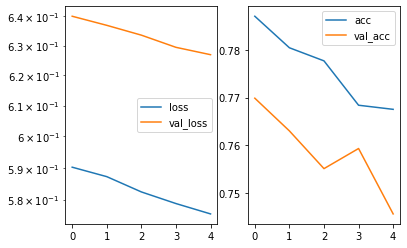

Predicted cell: Normal Probability: [[0.9257964]]
True Cell type: Normal
X [[0.29221708]]
True positional value X 0.5
Y [[0.41460174]]
True positional value Y 0.5
H [[0.36264876]]
True positional value H 0.5925925925925926
W [[0.48454326]]
True positional value W 0.37037037037037035
C [[0.5769805]]
True positional value C 0.0


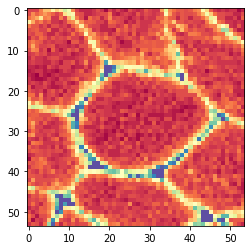

Epoch 6/250
36076/36076 [==============================] - 22s 604us/step - loss: 0.5721 - acc: 0.7640 - val_loss: 0.6246 - val_acc: 0.7483

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6245953096032708, 'val_acc': 0.7482885661534474, 'loss': 0.5720963876201673, 'acc': 0.7639982257427034, 'lr': 1e-06}


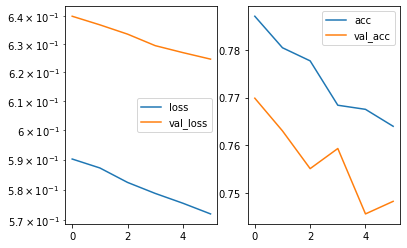

Predicted cell: MacroCheate Probability: [[0.9313799]]
True Cell type: MacroCheate
X [[0.5477443]]
True positional value X 0.6851851851851852
Y [[0.31818435]]
True positional value Y 0.5
H [[0.48121682]]
True positional value H 0.16666666666666666
W [[0.5593586]]
True positional value W 0.24074074074074073
C [[0.7003237]]
True positional value C 1.0


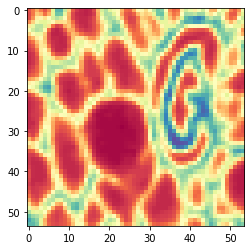

Epoch 7/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.5702 - acc: 0.7585 - val_loss: 0.6217 - val_acc: 0.7514

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6217079270570262, 'val_acc': 0.7514481239409243, 'loss': 0.5701679584654594, 'acc': 0.7585375305091294, 'lr': 1e-06}


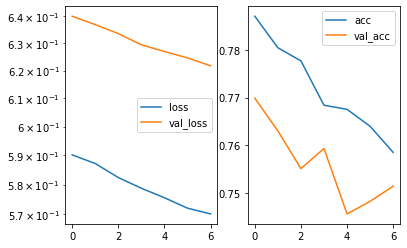

Predicted cell: MatureP1 Probability: [[0.9998165]]
True Cell type: MatureP1
X [[0.31152734]]
True positional value X 0.5
Y [[0.5816708]]
True positional value Y 0.6851851851851852
H [[0.4116777]]
True positional value H 0.4444444444444444
W [[0.44034097]]
True positional value W 0.3888888888888889
C [[0.53543544]]
True positional value C 1.0


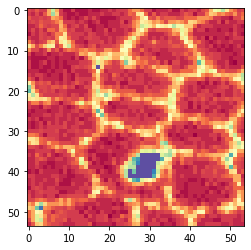

Epoch 8/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.5678 - acc: 0.7592 - val_loss: 0.6189 - val_acc: 0.7404

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6188921567136957, 'val_acc': 0.7403896784958179, 'loss': 0.567765245691796, 'acc': 0.7592027931827203, 'lr': 1e-06}


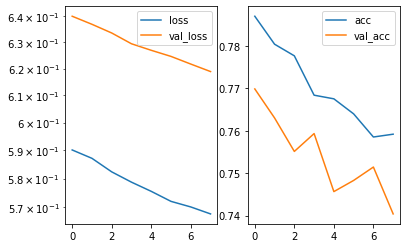

Predicted cell: Normal Probability: [[0.9686636]]
True Cell type: Normal
X [[0.42062914]]
True positional value X 0.5
Y [[0.51944995]]
True positional value Y 0.5
H [[0.4752387]]
True positional value H 0.3148148148148148
W [[0.42037386]]
True positional value W 0.3888888888888889
C [[0.401636]]
True positional value C 0.0


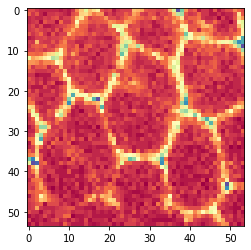

Epoch 9/250
36076/36076 [==============================] - 22s 596us/step - loss: 0.5638 - acc: 0.7578 - val_loss: 0.6178 - val_acc: 0.7388

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6177954506472326, 'val_acc': 0.7388098990684939, 'loss': 0.5637632639508037, 'acc': 0.7578445494948185, 'lr': 1e-06}


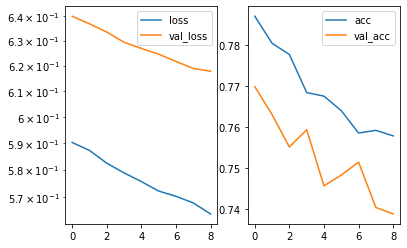

Predicted cell: MacroCheate Probability: [[0.99710256]]
True Cell type: MacroCheate
X [[0.35040468]]
True positional value X 0.5
Y [[0.55156124]]
True positional value Y 0.6851851851851852
H [[0.46779755]]
True positional value H 0.7037037037037037
W [[0.473019]]
True positional value W 0.9259259259259259
C [[0.5752766]]
True positional value C 1.0


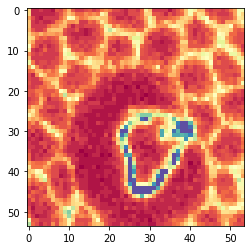

Epoch 10/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.5634 - acc: 0.7554 - val_loss: 0.6150 - val_acc: 0.7425

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6150065014838167, 'val_acc': 0.7424960461586887, 'loss': 0.5633878849578123, 'acc': 0.7553775372705037, 'lr': 1e-06}


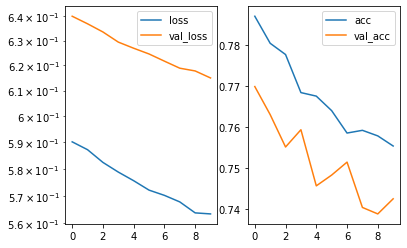

Predicted cell: NonMatureP1 Probability: [[0.9958639]]
True Cell type: NonMatureP1
X [[0.46439642]]
True positional value X 0.6851851851851852
Y [[0.4537098]]
True positional value Y 0.5
H [[0.39254087]]
True positional value H 0.25925925925925924
W [[0.38432938]]
True positional value W 0.3333333333333333
C [[0.63857055]]
True positional value C 1.0


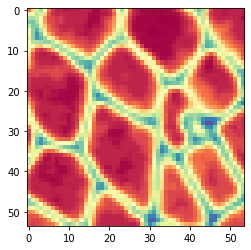

Epoch 11/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.5589 - acc: 0.7517 - val_loss: 0.6136 - val_acc: 0.7335

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.61360384455601, 'val_acc': 0.7335439704794078, 'loss': 0.5589225035652722, 'acc': 0.7517463134310306, 'lr': 1e-06}


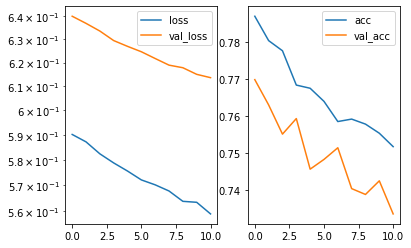

Predicted cell: MacroCheate Probability: [[0.9132311]]
True Cell type: MacroCheate
X [[0.54350454]]
True positional value X 0.6851851851851852
Y [[0.5099592]]
True positional value Y 0.6851851851851852
H [[0.44871944]]
True positional value H 0.5370370370370371
W [[0.4419515]]
True positional value W 0.5555555555555556
C [[0.50151116]]
True positional value C 1.0


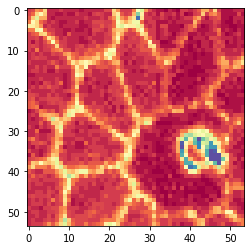

Epoch 12/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.5574 - acc: 0.7502 - val_loss: 0.6110 - val_acc: 0.7383

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6110153726491883, 'val_acc': 0.7382833066270376, 'loss': 0.5574321380567229, 'acc': 0.7501940345246031, 'lr': 1e-06}


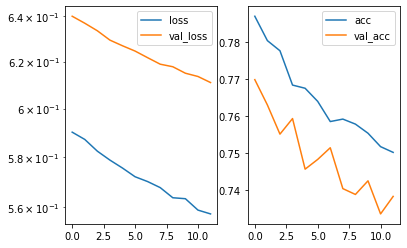

Predicted cell: Normal Probability: [[0.8629377]]
True Cell type: Normal
X [[0.49927944]]
True positional value X 0.5
Y [[0.49277228]]
True positional value Y 0.5
H [[0.45333415]]
True positional value H 0.3888888888888889
W [[0.51734626]]
True positional value W 0.4444444444444444
C [[0.39918476]]
True positional value C 0.0


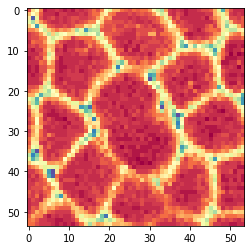

Epoch 13/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.5554 - acc: 0.7528 - val_loss: 0.6113 - val_acc: 0.7251

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6112854630147363, 'val_acc': 0.7251184862057996, 'loss': 0.5553528101411993, 'acc': 0.7527719253327395, 'lr': 1e-06}


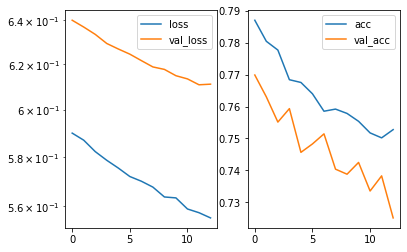

Predicted cell: Normal Probability: [[0.96722835]]
True Cell type: Normal
X [[0.46551204]]
True positional value X 0.5
Y [[0.5599204]]
True positional value Y 0.5
H [[0.47405085]]
True positional value H 0.35185185185185186
W [[0.5329031]]
True positional value W 0.25925925925925924
C [[0.36810076]]
True positional value C 0.0


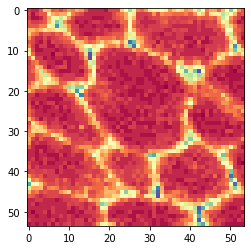

Epoch 14/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.5523 - acc: 0.7474 - val_loss: 0.6075 - val_acc: 0.7341

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6075370676458478, 'val_acc': 0.7340705629208641, 'loss': 0.5522551915871355, 'acc': 0.7474221085574202, 'lr': 1e-06}


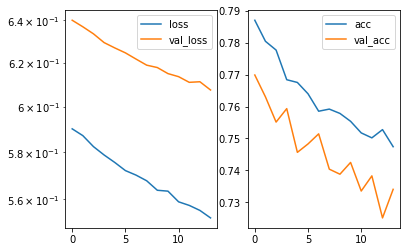

Predicted cell: NonMatureP1 Probability: [[0.8051695]]
True Cell type: NonMatureP1
X [[0.5448404]]
True positional value X 0.6851851851851852
Y [[0.47648114]]
True positional value Y 0.3148148148148148
H [[0.4876402]]
True positional value H 0.5185185185185185
W [[0.5234446]]
True positional value W 0.5925925925925926
C [[0.46159685]]
True positional value C 1.0


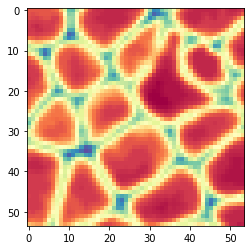

Epoch 15/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.5515 - acc: 0.7447 - val_loss: 0.6061 - val_acc: 0.7304

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6061189293296416, 'val_acc': 0.7303844158306695, 'loss': 0.5515318621465882, 'acc': 0.7446779022196706, 'lr': 1e-06}


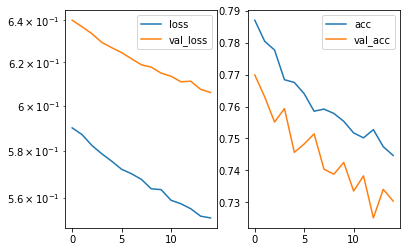

Predicted cell: MatureP1 Probability: [[0.9951871]]
True Cell type: MatureP1
X [[0.4806232]]
True positional value X 0.6851851851851852
Y [[0.47448128]]
True positional value Y 0.5
H [[0.46684897]]
True positional value H 0.2962962962962963
W [[0.4993322]]
True positional value W 0.3148148148148148
C [[0.6112567]]
True positional value C 1.0


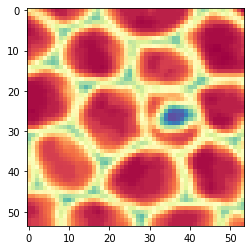

Epoch 16/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.5508 - acc: 0.7447 - val_loss: 0.6042 - val_acc: 0.7372

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6041754519958255, 'val_acc': 0.737230120708341, 'loss': 0.550793668940665, 'acc': 0.7446779025038485, 'lr': 1e-06}


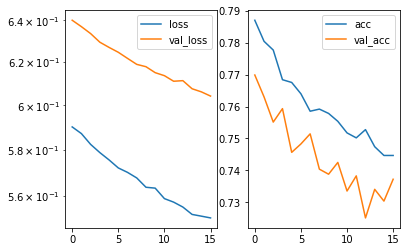

Predicted cell: Normal Probability: [[0.99069387]]
True Cell type: Normal
X [[0.5093436]]
True positional value X 0.5
Y [[0.5155044]]
True positional value Y 0.5
H [[0.4317852]]
True positional value H 0.2962962962962963
W [[0.45586744]]
True positional value W 0.42592592592592593
C [[0.33586282]]
True positional value C 0.0


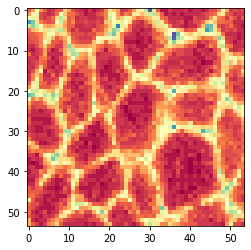

Epoch 17/250
36076/36076 [==============================] - 22s 603us/step - loss: 0.5481 - acc: 0.7441 - val_loss: 0.6023 - val_acc: 0.7341

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6023188362063829, 'val_acc': 0.7340705660596027, 'loss': 0.5481168448938236, 'acc': 0.7440957975355851, 'lr': 1e-06}


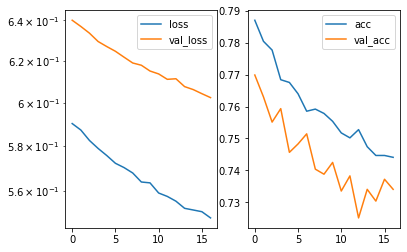

Predicted cell: NonMatureP1 Probability: [[0.968599]]
True Cell type: NonMatureP1
X [[0.4505735]]
True positional value X 0.6851851851851852
Y [[0.48504013]]
True positional value Y 0.6851851851851852
H [[0.44852898]]
True positional value H 0.5740740740740741
W [[0.50616056]]
True positional value W 0.42592592592592593
C [[0.4324416]]
True positional value C 1.0


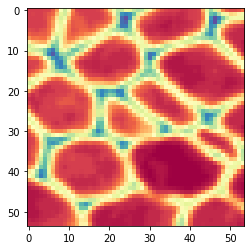

Epoch 18/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.5456 - acc: 0.7455 - val_loss: 0.6010 - val_acc: 0.7309

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6010073017232854, 'val_acc': 0.7309110051333872, 'loss': 0.5455956990391839, 'acc': 0.745481761447711, 'lr': 1e-06}


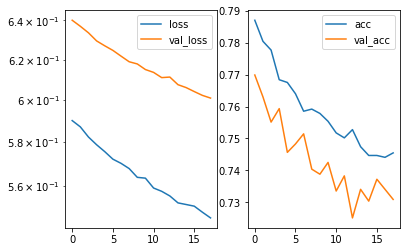

Predicted cell: NonMatureP1 Probability: [[0.9786281]]
True Cell type: NonMatureP1
X [[0.4187837]]
True positional value X 0.3148148148148148
Y [[0.48234075]]
True positional value Y 0.3148148148148148
H [[0.4591413]]
True positional value H 0.35185185185185186
W [[0.46721223]]
True positional value W 0.37037037037037035
C [[0.5189676]]
True positional value C 1.0


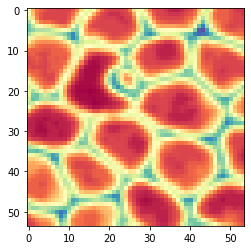

Epoch 19/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.5440 - acc: 0.7419 - val_loss: 0.6004 - val_acc: 0.7267

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6003957513509894, 'val_acc': 0.7266982635301688, 'loss': 0.5440460547783353, 'acc': 0.7419059776667679, 'lr': 1e-06}


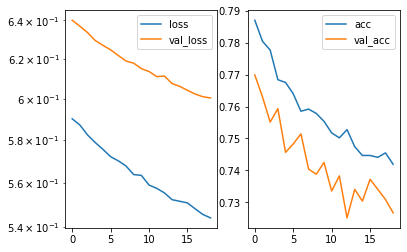

Predicted cell: MatureP1 Probability: [[0.57525516]]
True Cell type: MatureP1
X [[0.48638153]]
True positional value X 0.6851851851851852
Y [[0.3702015]]
True positional value Y 0.5
H [[0.34654373]]
True positional value H 0.35185185185185186
W [[0.2725649]]
True positional value W 0.46296296296296297
C [[0.6232162]]
True positional value C 1.0


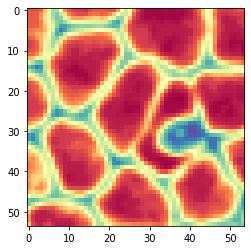

Epoch 20/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.5424 - acc: 0.7399 - val_loss: 0.5986 - val_acc: 0.7246

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.5985905744955375, 'val_acc': 0.7245918958359107, 'loss': 0.5424483520702587, 'acc': 0.7398824697720369, 'lr': 1e-06}


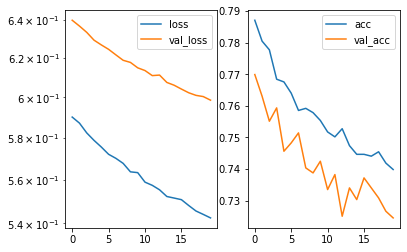

Predicted cell: MacroCheate Probability: [[0.9993942]]
True Cell type: MacroCheate
X [[0.3893816]]
True positional value X 0.3148148148148148
Y [[0.5410828]]
True positional value Y 0.5
H [[0.56971127]]
True positional value H 0.9259259259259259
W [[0.43056494]]
True positional value W 0.6666666666666666
C [[0.6755047]]
True positional value C 1.0


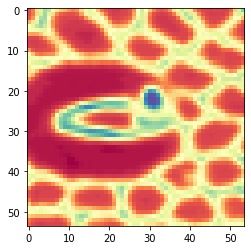

Epoch 21/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.5416 - acc: 0.7402 - val_loss: 0.5978 - val_acc: 0.7230

Epoch 00021: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.5978011640201687, 'val_acc': 0.7230121101624969, 'loss': 0.5415629863454836, 'acc': 0.740159664030865, 'lr': 1e-06}


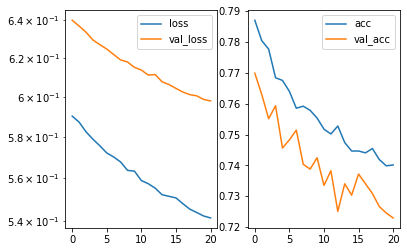

Predicted cell: MacroCheate Probability: [[0.9983766]]
True Cell type: MacroCheate
X [[0.47616607]]
True positional value X 0.6851851851851852
Y [[0.4859293]]
True positional value Y 0.6851851851851852
H [[0.27950904]]
True positional value H 0.46296296296296297
W [[0.44622737]]
True positional value W 0.6851851851851852
C [[0.59350157]]
True positional value C 1.0


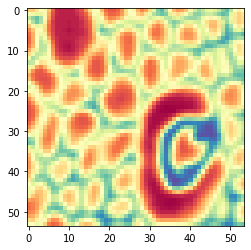

Epoch 22/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.5392 - acc: 0.7332 - val_loss: 0.5958 - val_acc: 0.7330

Epoch 00022: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.5957627742148626, 'val_acc': 0.7330173801409062, 'loss': 0.5392142479799581, 'acc': 0.7331744095269057, 'lr': 1e-06}


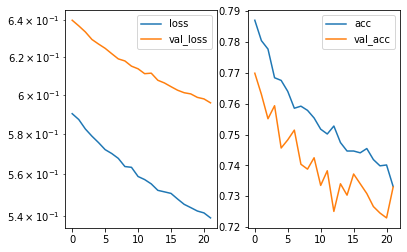

Predicted cell: MatureP1 Probability: [[0.9833265]]
True Cell type: MatureP1
X [[0.6808526]]
True positional value X 0.6851851851851852
Y [[0.45326158]]
True positional value Y 0.3148148148148148
H [[0.36966953]]
True positional value H 0.35185185185185186
W [[0.5548811]]
True positional value W 0.37037037037037035
C [[0.7575486]]
True positional value C 1.0


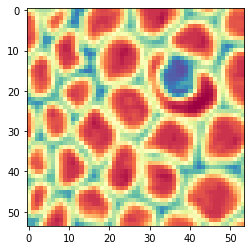

Epoch 23/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.5391 - acc: 0.7408 - val_loss: 0.5948 - val_acc: 0.7283

Epoch 00023: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.5947520989000703, 'val_acc': 0.7282780377157994, 'loss': 0.5391088375357649, 'acc': 0.7407972059647463, 'lr': 1e-06}


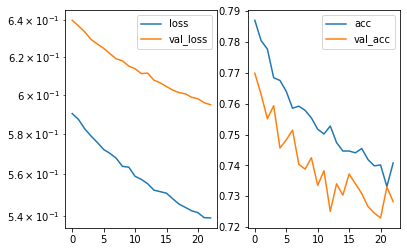

Predicted cell: MatureP1 Probability: [[0.9504352]]
True Cell type: MatureP1
X [[0.3234604]]
True positional value X 0.3148148148148148
Y [[0.56877697]]
True positional value Y 0.6851851851851852
H [[0.45476964]]
True positional value H 0.42592592592592593
W [[0.48698318]]
True positional value W 0.3888888888888889
C [[0.5985317]]
True positional value C 1.0


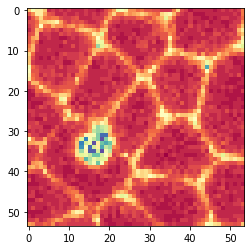

Epoch 24/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.5369 - acc: 0.7358 - val_loss: 0.5955 - val_acc: 0.7193

Epoch 00024: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.5954842731599873, 'val_acc': 0.7193259578306088, 'loss': 0.5369320124939575, 'acc': 0.735835458152719, 'lr': 1e-06}


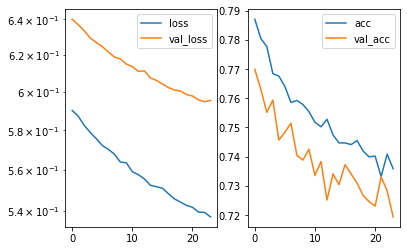

Predicted cell: MacroCheate Probability: [[0.9995968]]
True Cell type: MacroCheate
X [[0.54219604]]
True positional value X 0.6851851851851852
Y [[0.4589039]]
True positional value Y 0.3148148148148148
H [[0.45556736]]
True positional value H 0.9259259259259259
W [[0.54093647]]
True positional value W 0.9444444444444444
C [[0.81604373]]
True positional value C 1.0


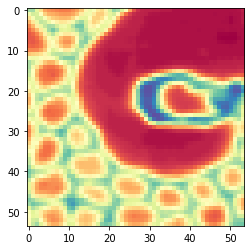

Epoch 25/250
 9500/36076 [======>.......................] - ETA: 15s - loss: 0.5428 - acc: 0.7317

In [ ]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
